In [3]:
import numpy as np

In [4]:
data=np.loadtxt("data.csv", delimiter=",")

In [5]:
print(data.shape)
print(data)

(100, 2)
[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]
 [ 52.22399609  63.35879032]
 [ 35.56783005  41.4128853 ]
 [ 42.43647694  76.61734128]
 [ 58.16454011  96.76956643]
 [ 57

In [6]:
x=data[:,0].reshape(-1,1)
y=data[:,1]

In [7]:
x.shape,y.shape

((100, 1), (100,))

In [8]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(x_train, y_train)

LinearRegression()

In [9]:
alg1.coef_

array([1.34354606])

In [10]:
alg1.intercept_

6.848481317332812

<function matplotlib.pyplot.show(close=None, block=None)>

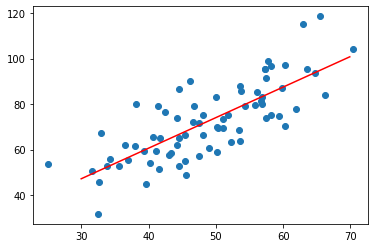

In [11]:
import matplotlib.pyplot as plt
m=alg1.coef_[0]
c=alg1.intercept_

x_line=np.arange(30,70,0.1)
y_line=m*x_line + c
train_1d=x_train.reshape(75)
plt.plot(x_line,y_line,color="red")
plt.scatter(x_train,y_train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

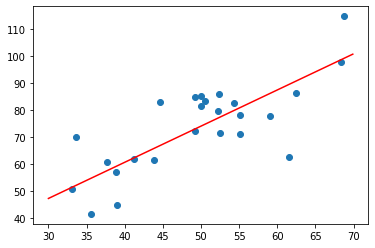

In [12]:
import matplotlib.pyplot as plt
m=alg1.coef_[0]
c=alg1.intercept_

x_line=np.arange(30,70,0.1)
y_line=m*x_line + c
train_1d=x_test.reshape(25)
plt.plot(x_line,y_line,color="red")
plt.scatter(x_test,y_test)
plt.show

In [13]:
print(train_1d)
print(x_train)

[50.03017434 33.09383174 50.03957594 33.64470601 55.14218841 38.81681754
 41.18201611 52.37844622 44.68719623 68.31936082 52.21179669 68.76573427
 37.67565486 62.49469743 38.95476907 49.23976534 59.04974121 50.55676015
 54.35163488 43.87061265 55.0780959  52.55001444 35.56783005 49.20388754
 61.53035803]
[[45.44053073]
 [48.95588857]
 [31.588117  ]
 [46.68222865]
 [39.55790122]
 [56.86890066]
 [54.28232871]
 [45.61864377]
 [57.36205213]
 [44.55560838]
 [59.37082201]
 [51.08863468]
 [62.99748075]
 [52.22399609]
 [41.10268519]
 [50.13548549]
 [32.66904376]
 [47.47563963]
 [51.0887199 ]
 [42.43647694]
 [56.13038882]
 [48.10504169]
 [53.66093226]
 [57.78822399]
 [63.61556125]
 [61.89622268]
 [50.18638949]
 [60.26921439]
 [50.07314563]
 [46.2309665 ]
 [55.80573336]
 [39.29956669]
 [70.34607562]
 [40.16689901]
 [45.41973014]
 [46.73761941]
 [64.70713867]
 [57.50444762]
 [41.72067636]
 [36.93007661]
 [44.1640495 ]
 [47.48120861]
 [58.16847072]
 [36.43600951]
 [41.37772653]
 [53.57507753]
 [50

# Coefficient of Determination

In [14]:
score_test=alg1.score(x_test,y_test) 
score_train=alg1.score(x_train,y_train)
score_test,score_train

(0.5903625836206245, 0.6002146390575918)

# Coding Linear Regression

In [34]:
import numpy as np

In [35]:
data=np.loadtxt("data.csv", delimiter=",")

In [36]:
x=data[:,0]
y=data[:,1]

In [37]:
x.shape

(100,)

In [55]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)
y_train.shape

(70,)

In [29]:
def fit(x_train,y_train):
    num=(x_train * y_train).mean() - x_train.mean()*y_train.mean()
    den= (x_train**2).mean() - x_train.mean()**2
    m=num/den
    c=y_train.mean() - m*x_train.mean()
    return m,c

In [42]:
def predict(x,m,c):
    return m * x +c

def score(y_truth, y_pred):
    u=((y_truth - y_pred)**2).sum()
    v=((y_truth - y_truth.mean())**2).sum()
    return 1 - u/v

def cost(x,y,m,c):
    ((y-m*x -c)**2).mean()

In [57]:
m,c=fit(x_train,y_train)

print(m,c)


1.360009979681841 7.079477877028765


array([ 97.91982104,  80.20752314, 104.25710159,  61.68403752,
        79.05240617,  83.14274979,  71.54663223,  90.12357207,
        70.25193442,  79.55043668,  95.22936602,  84.74269781,
        65.56230126,  44.84712424,  62.00892325,  82.47884676,
        59.35885025,  79.12064627,  74.08413012,  59.10883927,
        97.37989686,  87.99445276,  48.84715332,  76.61734128,
        81.43619216,  57.81251298,  86.09829121,  75.38065167,
        83.43207142,  85.49806778,  55.16567715,  82.89250373,
        53.45439421,  75.39287043,  71.13972786,  69.58889785,
        79.64197305,  99.05141484,  50.39267014, 115.2441528 ,
       118.5912173 ,  79.10282968,  72.11183247,  85.23200734,
        96.76956643,  77.63418251,  52.68298337,  95.53668685,
        54.0840548 ,  95.45505292,  44.86249071,  65.10171157,
        85.66820315,  52.72173496,  62.5623823 ,  52.72549438,
        69.51050331,  73.68756432,  72.24725107,  63.35879032,
       114.85387123,  55.23166089,  67.17065577,  93.57

In [64]:
#train data
y_train_pred = predict(x_train,m,c)
y_train_pred
score("Train score:",score(y_train ,y_train_pred))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U12'), dtype('float64')) -> None

In [53]:
print("M,C", m,c)
print("Cost on training data",cost(x_train,y_train,m,c))

M,C 1.3684463340905884 5.550985311755838
Cost on training data None


In [54]:
#test data
y_test_pred=predict(x_test,m,c)
print("Test score" ,score(y_test , y_test_pred))

Test score 0.5250353382126454
